In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad

Proszę pobrać dowolny duży obraz. Otwórzmy go w pythonie w skali szarości i przekonwertujmy do numpy array.

Załóżmy że jego rozdzielczość to $m$ na $n$. Potraktujmy go jako $m$ wektorów $n$ wymiarowych.

Zredukujmy dane za pomocą SVD z $n$ wymiarów do $k$ wymiarów (proszę rozważyć różne $k$). 

Zrekonstruujmy teraz obraz z wymiaru $k$ do oryginalnego wymiaru i zobaczmy jak wyglądają.



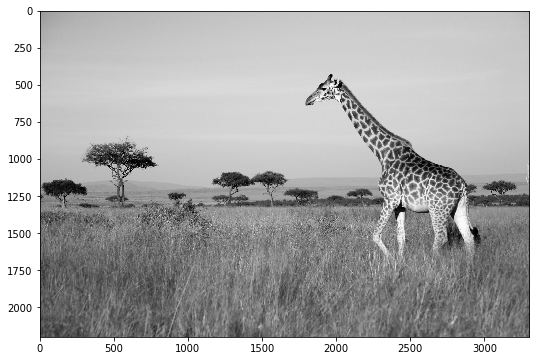

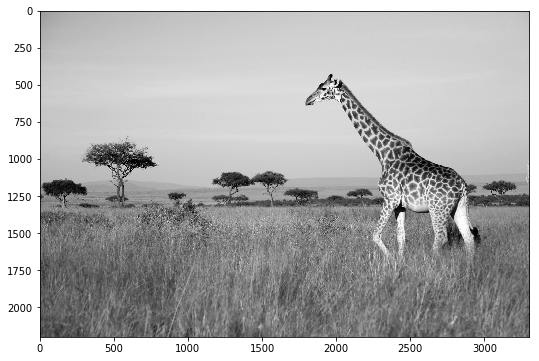

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

img = Image.open('datasets/1.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
#imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [3]:
imgmat = imgmat/255
imgmat

array([[0.60392157, 0.60392157, 0.60392157, ..., 0.7254902 , 0.72156863,
        0.71764706],
       [0.60784314, 0.60392157, 0.60392157, ..., 0.72156863, 0.72156863,
        0.71764706],
       [0.60784314, 0.60784314, 0.60392157, ..., 0.72156863, 0.72156863,
        0.71764706],
       ...,
       [0.19607843, 0.19215686, 0.18431373, ..., 0.37254902, 0.35686275,
        0.34509804],
       [0.18823529, 0.18039216, 0.18039216, ..., 0.37254902, 0.35294118,
        0.34117647],
       [0.18431373, 0.17647059, 0.17647059, ..., 0.38039216, 0.36078431,
        0.34901961]])

# Zad 
Prosze wykonać rozkład SVD i narysować wykres przedstawiający najwarzniejsze komponenty.

In [4]:
U,s,VT = np.linalg.svd(imgmat)

In [5]:
print(U.shape)
print(s.shape)
print(VT.shape)

(2200, 2200)
(2200,)
(3300, 3300)


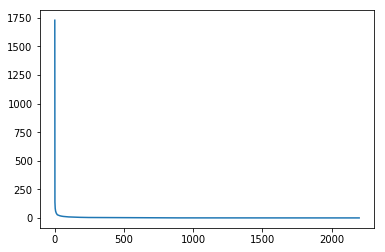

In [6]:
plt.plot(s)
plt.show()

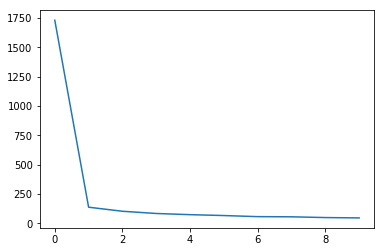

In [7]:
plt.plot(s[:10])
plt.show()

# Zad
Proszę narysować zdjęcio z 10 komponentami.

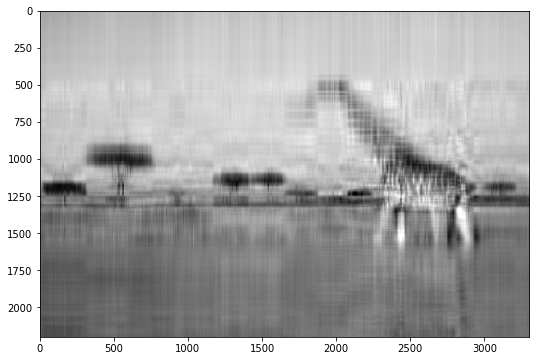

In [8]:
k = 10
im2 = np.dot(np.dot(U[:,:k],np.diag(s[:k])),VT[:k,:])
im2[im2<0] = 0
im2[im2>1] = 1
plt.figure(figsize=(9,6))
plt.imshow(im2, cmap='gray')
plt.show()

# Zad
Proszę narysowac wyniki dla 

$$
k = 1, ..., 100
$$

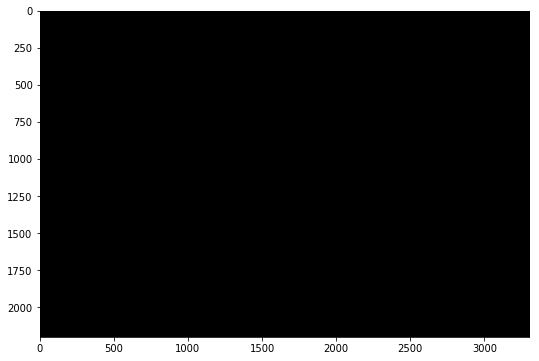

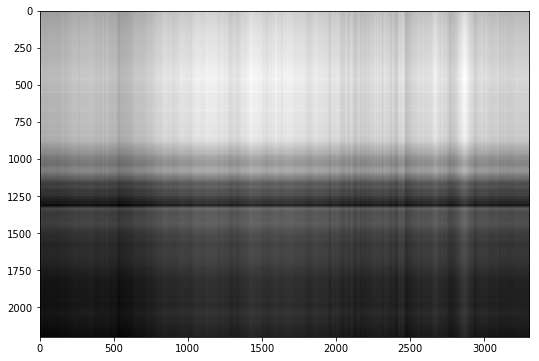

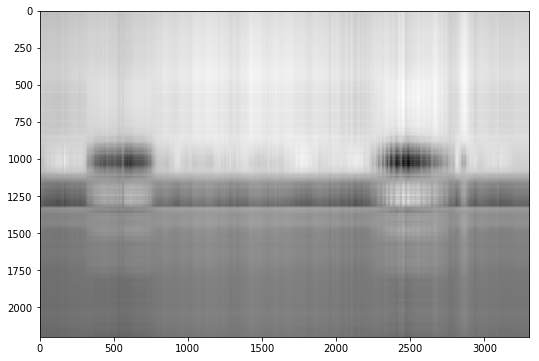

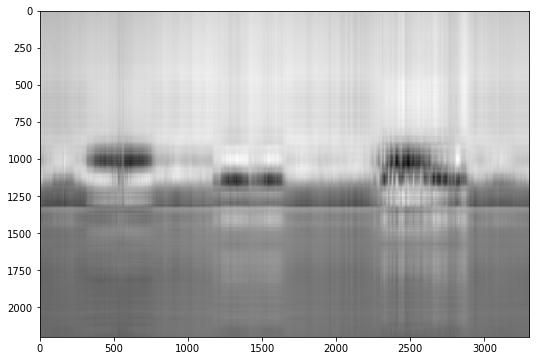

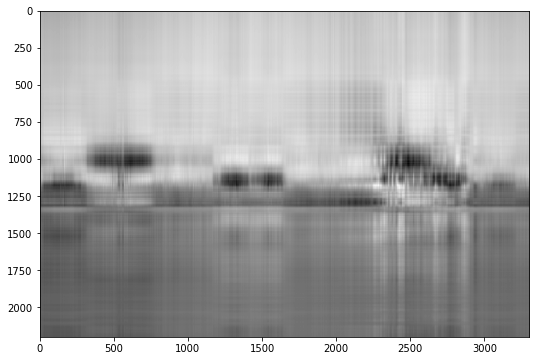

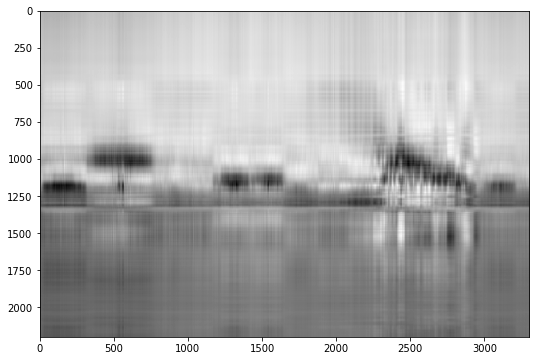

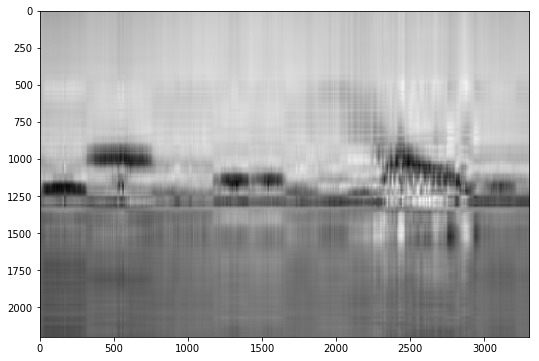

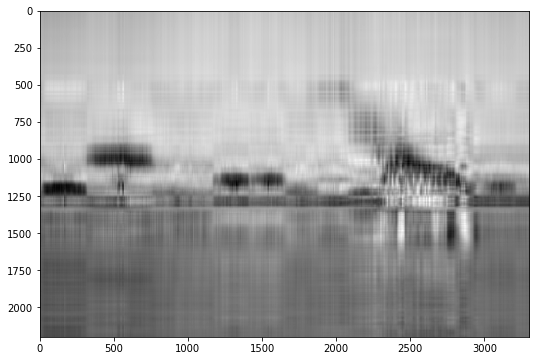

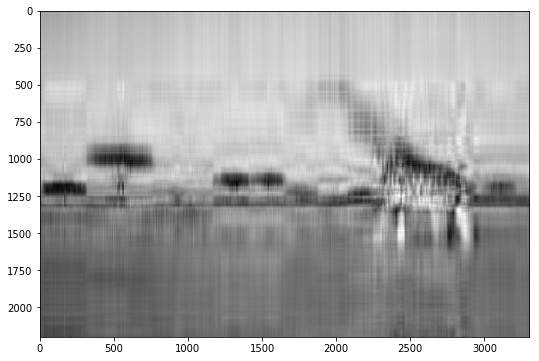

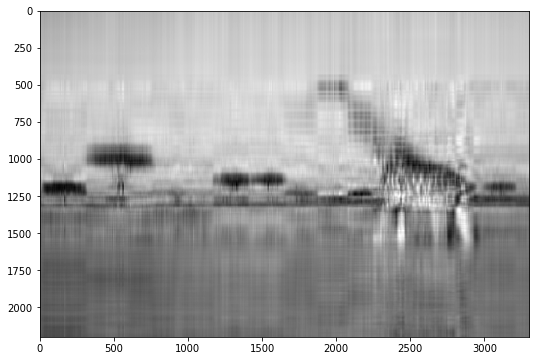

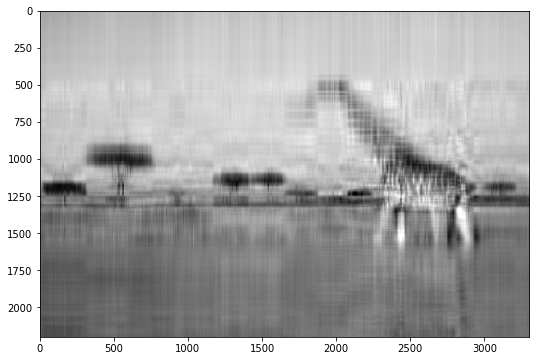

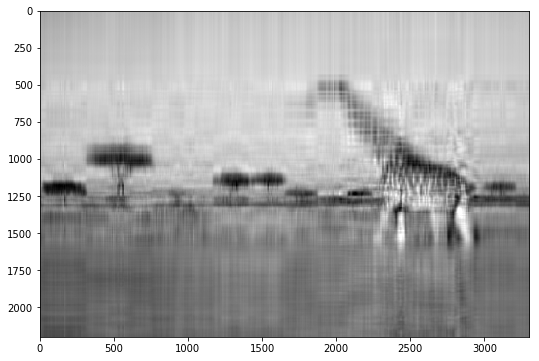

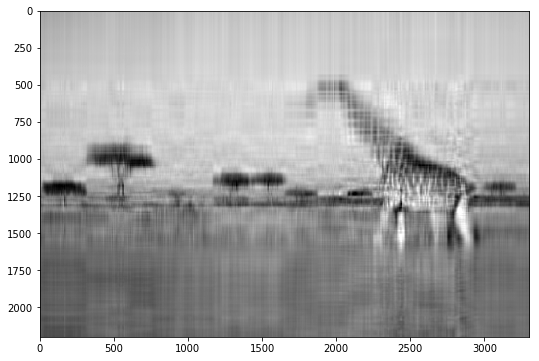

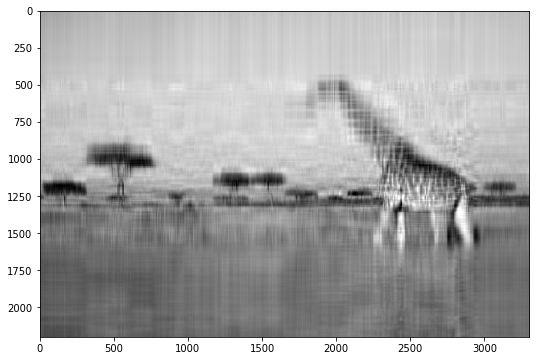

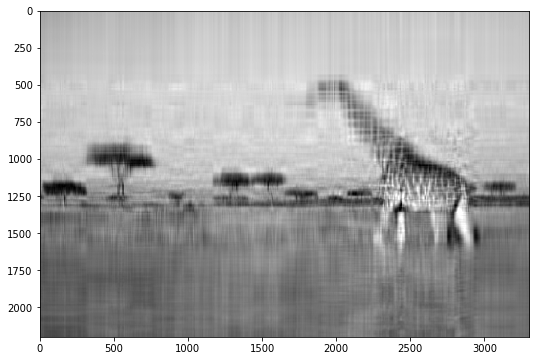

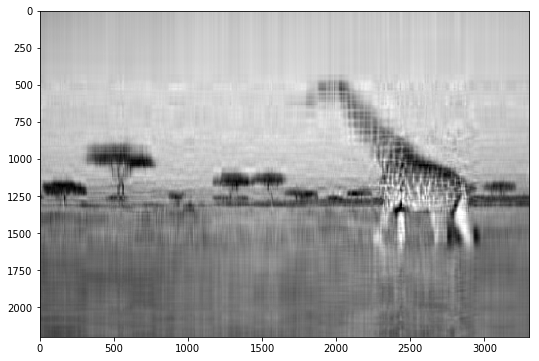

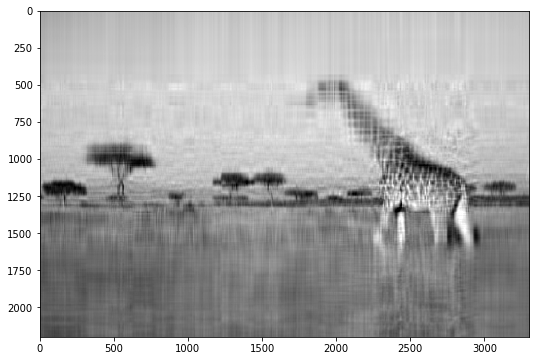

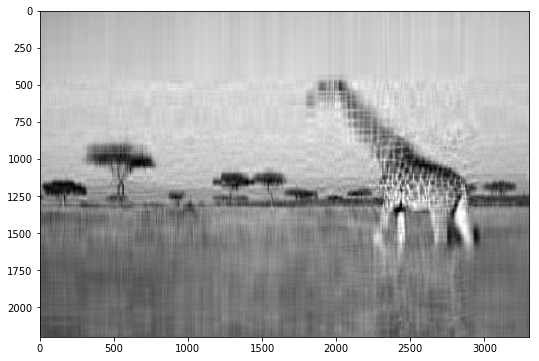

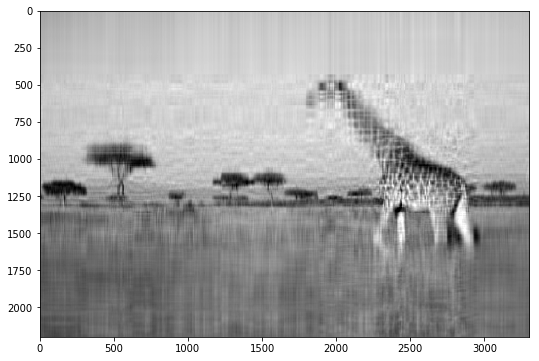

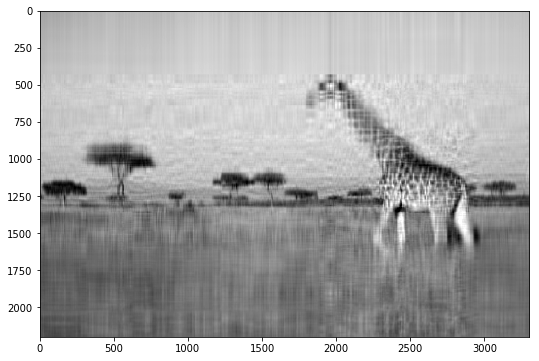

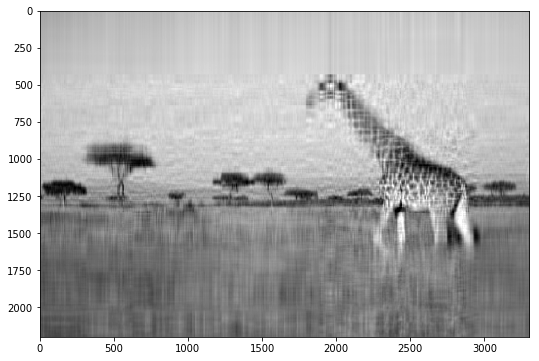

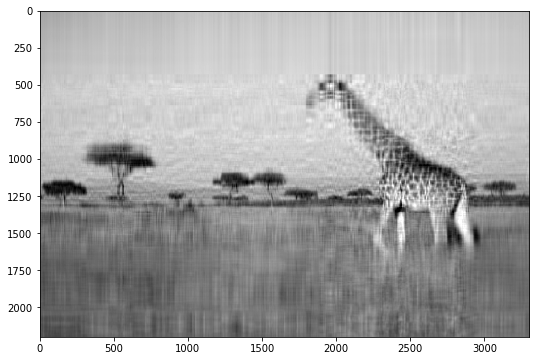

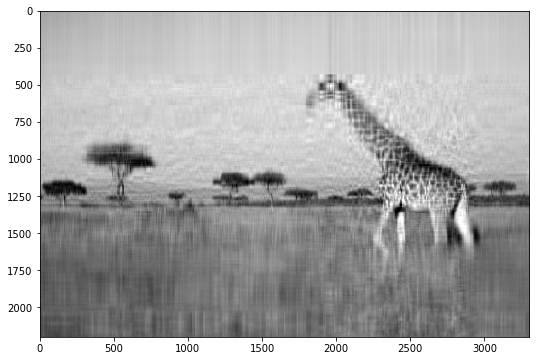

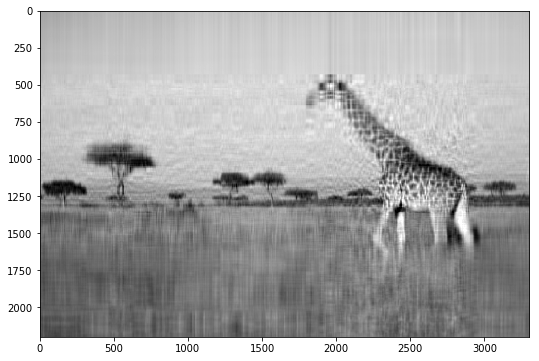

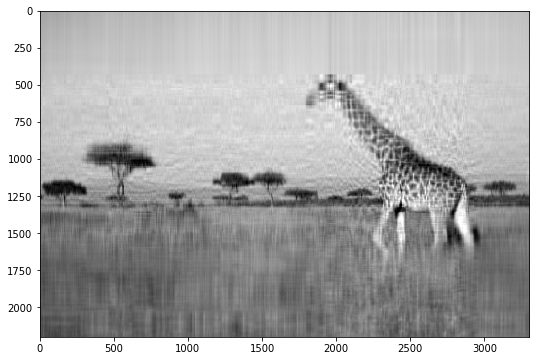

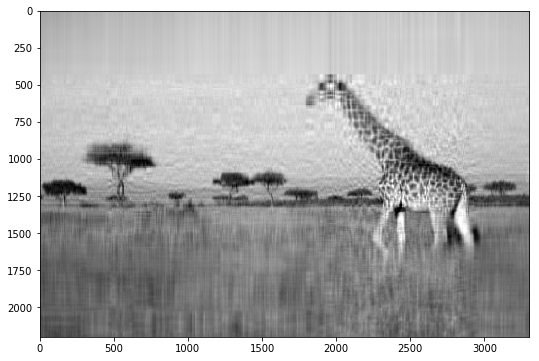

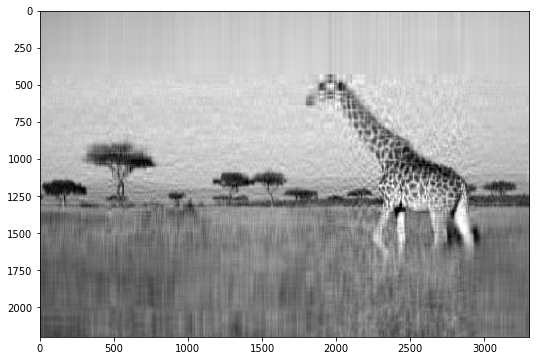

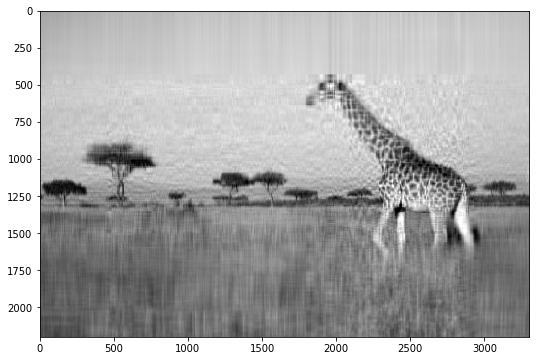

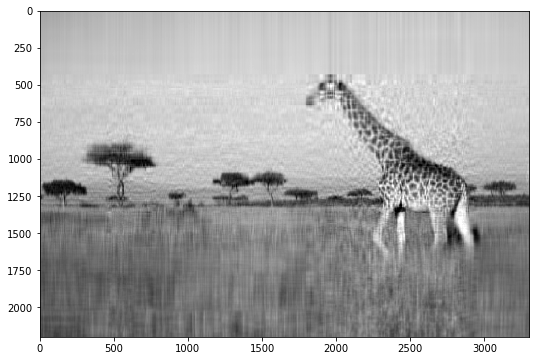

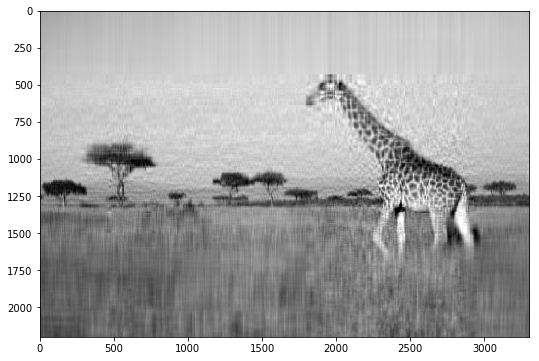

In [ ]:
for i in range(200):
    k = i
    im2 = np.dot(np.dot(U[:,:k],np.diag(s[:k])),VT[:k,:])
    im2[im2<0] = 0
    im2[im2>1] = 1
    plt.figure(figsize=(9,6))
    plt.imshow(im2, cmap='gray')
    plt.show()

# Zad
Wykonaj alogiczne zadania na danych w formacie RGB.

Traktujemy kanały RGB niezależnie i wykonujemy na nich procedurę osobno.


In [ ]:
import PIL.Image as Image
im = Image.open("datasets/1.jpg")
plt.figure(figsize=(9,6))
plt.imshow(im)
plt.show()

In [ ]:
im = np.array(im)/255
im
#im.nbytes

In [ ]:
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

In [ ]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

In [ ]:
plt.plot(s_r)
plt.show()

In [ ]:
plt.plot(s_r[10:])
plt.show()

In [ ]:
k = 5

im2_r = np.dot(np.dot(U_r[:,:k],np.diag(s_r[:k])),V_r[:k,:])
im2_g = np.dot(np.dot(U_g[:,:k],np.diag(s_g[:k])),V_g[:k,:])
im2_b = np.dot(np.dot(U_b[:,:k],np.diag(s_b[:k])),V_b[:k,:])

im2 = np.zeros_like(im)
im2[:,:,0] = im2_r
im2[:,:,1] = im2_g
im2[:,:,2] = im2_b
im2[im2<0] = 0
im2[im2>1] = 1

plt.figure(figsize=(9,6))
plt.imshow(im2)
plt.show()

In [ ]:
k = 150

im2_r = np.dot(np.dot(U_r[:,:k],np.diag(s_r[:k])),V_r[:k,:])
im2_g = np.dot(np.dot(U_g[:,:k],np.diag(s_g[:k])),V_g[:k,:])
im2_b = np.dot(np.dot(U_b[:,:k],np.diag(s_b[:k])),V_b[:k,:])

im2 = np.zeros_like(im)
im2[:,:,0] = im2_r
im2[:,:,1] = im2_g
im2[:,:,2] = im2_b
im2[im2<0] = 0
im2[im2>1] = 1

plt.figure(figsize=(9,6))
plt.imshow(im2)
plt.show()

## Wniosek: zamiast pamiętać całego zdjęcia możemy pamiętać rozkład SVD

In [ ]:
im.nbytes

In [ ]:
3*np.sum([x.nbytes for x in 
        [U_r[:,:k],s_r[:k],V_r[:k,:]]])

# Zad

Wykonaj analogiczne zadania za pomocą wbudowanej funkcji:

```python
from sklearn.decomposition import TruncatedSVD
```

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_com = k = 150

svd_r = TruncatedSVD(n_components = n_com)
svd_r.fit(im_r)
svd_g = TruncatedSVD(n_components = n_com)
svd_g.fit(im_g)
svd_b = TruncatedSVD(n_components = n_com)
svd_b.fit(im_b)

In [ ]:
im2_r = svd_r.transform(im_r)
im2_g = svd_g.transform(im_g)
im2_b = svd_b.transform(im_b)

print(im_r.shape)
print(im_g.shape)
print(im_b.shape)

print(im2_r.shape)
print(im2_g.shape)
print(im2_b.shape)

In [ ]:
im2_r_new = np.dot(im2_r, svd_r.components_)
im2_g_new = np.dot(im2_g, svd_g.components_)
im2_b_new = np.dot(im2_b, svd_b.components_)

print(im2_r_new.shape)
print(im2_g_new.shape)
print(im2_b_new.shape)

In [ ]:
im3 = np.zeros_like(im)
im3[:,:,0] = im2_r_new
im3[:,:,1] = im2_g_new
im3[:,:,2] = im2_b_new
im3[im3<0] = 0
im3[im3>1] = 1

plt.figure(figsize=(9,6))
plt.imshow(im3)
plt.show()

# Zad

* Proszę teraz potraktować obrazek jako zbiór kostek 8 na 8 - czyli dostajemy wektor 64 wymiarowy. 
* Dokonać tej samej procedury kompresji. Które podejście daje mniejszy błąd od oryginału używając tej samej ilości komponentów (dowolna odlegość po pikselach) - dlaczego?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

img = Image.open('datasets/1.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
#imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.show()

Obcinamy obrazek, tak by wysokość i szetrokość była podzielna przez 8

In [ ]:
h_size = int(imgmat.shape[1]/8) * 8
v_size = int(imgmat.shape[0]/8)*8

X = imgmat[:v_size, :h_size]

In [ ]:
plt.figure(figsize=(9,6))
plt.imshow(X, cmap = 'gray')
plt.show()

Przygotowywujemy tablice na nasze kostki

In [ ]:
res = np.zeros((int(X.shape[0]*X.shape[1] / 64), 64))

Wypełniamy tablicę

In [ ]:
licz = 0
for i in range(0,X.shape[0],8):
    for j in range(0,X.shape[1],8):
        tmp = X[i:i+8, j:j+8].flatten()
        res[licz, :] = tmp
        licz = licz + 1

# Zad

Jak wygląda zdjęcie z 5 współrzędnymi

In [ ]:
n_com = 5

svd = TruncatedSVD(n_components = n_com)
svd.fit(res)
Y = svd.transform(res)

print(Y.shape)
# print(dec.shape)

In [ ]:
svd.components_.shape

In [ ]:
dec = np.dot(Y, svd.components_)
dec.shape

In [ ]:
Z = np.zeros((v_size, h_size))

In [ ]:
licz = 0
for i in range(0,Z.shape[0],8):
    for j in range(0,Z.shape[1],8):
        Z[i:i+8, j:j+8] = np.reshape(dec[licz], (8,8))
        licz = licz + 1

In [ ]:
plt.figure(figsize=(9,6))
plt.imshow(Z, cmap = 'gray')
plt.show()

# Zad
Proszę narysowac wyniki dla 

$$
k = 1, ..., 100
$$

In [ ]:
for i in range(20):
    n_com = i

    svd = TruncatedSVD(n_components = n_com)
    svd.fit(res)
    Y = svd.transform(res)
    dec = np.dot(Y, svd.components_)
    Z = np.zeros((v_size, h_size))
    licz = 0
    for i in range(0,Z.shape[0],8):
        for j in range(0,Z.shape[1],8):
            Z[i:i+8, j:j+8] = np.reshape(dec[licz], (8,8))
            licz = licz + 1
            
    plt.figure(figsize=(9,6))
    plt.imshow(Z, cmap = 'gray')
    plt.show()        

    

In [ ]:
# U, s, V = np.linalg.svd(res)
# S = np.zeros_like(res)
# np.fill_diagonal(S,s)
# plt.plot(range(1,len(s)+1),s)
# plt.xlim(0,10)
# plt.show()
# print(s)